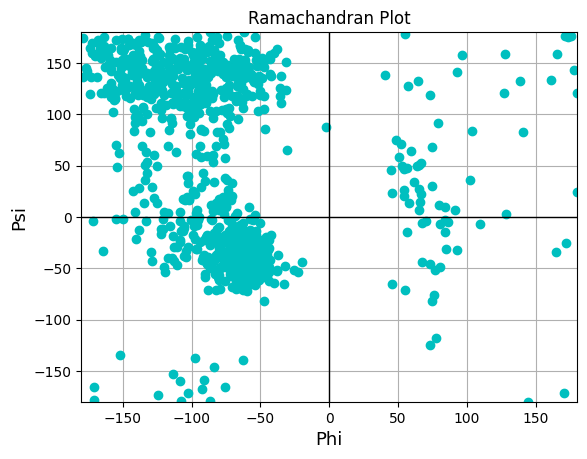

In [1]:
#phi and psi dihedral angles 
import numpy as np
import matplotlib.pyplot as plt

class atom:
    def __init__(self,atomline):
        self.atomnum=int(atomline[6:11].strip())
        self.atomname=atomline[13:16].strip()
        self.residuename=atomline[17:20].strip()
        self.chain=atomline[21]
        self.residuenum=int(atomline[22:28].strip())
        self.x=float(atomline[30:38].strip())
        self.y=float(atomline[38:46].strip())
        self.z=float(atomline[46:54].strip())

class residue:
    def __init__(self,atomobjs):
        self.resname=atomobjs[0].residuename
        self.resnum=atomobjs[0].residuenum
        self.chain=atomobjs[0].chain
        self.phi=None
        self.psi=None
        self.n=None
        self.ca=None
        self.c=None
        for i in atomobjs:
            if i.atomname=='N':
                self.n=i
                continue
            if i.atomname=='CA':
                self.ca=i
            if i.atomname=='C':
                self.c=i

f=open("1asy.pdb")
x=f.readlines()
f.close()

atomlines=[]
for i in x:
    if i.startswith('ATOM'):
        atomlines.append(i)
        
atomobjs=[]
for i in atomlines:
    atomobjs.append(atom(i))

residues=[]
proteinobjs=[]
rnaobjs=[]
temp=[]

for i in atomobjs:
    if len(i.residuename)==3:
        proteinobjs.append(i)
    else:
        rnaobjs.append(i)

for i in range(len(proteinobjs)):
    temp.append(proteinobjs[i])
    if i==len(proteinobjs)-1 or proteinobjs[i].residuenum!=proteinobjs[i+1].residuenum:
        residues.append(residue(temp))
        temp=[]

def dihedral(atom1,atom2,atom3,atom4):
    v1=[atom2.x-atom1.x,atom2.y-atom1.y,atom2.z-atom1.z]
    v2=[atom3.x-atom2.x,atom3.y-atom2.y,atom3.z-atom2.z]
    v3=[atom4.x-atom3.x,atom4.y-atom3.y,atom4.z-atom3.z]

    n1=np.cross(v1,v2)
    n2=np.cross(v2,v3)
    angle=np.arccos(np.dot(n1,n2)/(np.linalg.norm(n1)*np.linalg.norm(n2)))

    n3=np.cross(n1,n2)
    costheta=np.dot(v2,n3)/(np.linalg.norm(n3)*np.linalg.norm(v2))

    if costheta<0:
        angle*=-1
    return round(angle*180/np.pi,3)

for i in range(len(residues)):
    if i==0 or residues[i-1].chain!=residues[i].chain:
        residues[i].phi=180
        residues[i].psi=dihedral(residues[i].n,residues[i].ca,residues[i].c,residues[i+1].n)
    elif i==len(residues)-1 or residues[i+1].chain!=residues[i].chain:
        residues[i].phi=dihedral(residues[i-1].c,residues[i].n,residues[i].ca,residues[i].c)
        residues[i].psi=180
    else:
        residues[i].phi=dihedral(residues[i-1].c,residues[i].n,residues[i].ca,residues[i].c)
        residues[i].psi=dihedral(residues[i].n,residues[i].ca,residues[i].c,residues[i+1].n)

phis=[]
psis=[]

for i in residues:
    phis.append(i.phi)
    psis.append(i.psi)

#print('Number\tPhi\tPsi')
#for i in range(len(phis)):
#    print(str(i)+'\t'+str(phis[i]+'\t'+str(psis[i])))

plt.figure()
plt.plot(phis,psis,'co')
plt.title('Ramachandran Plot')
plt.xlabel('Phi',fontsize=13)
plt.ylabel('Psi',fontsize=13)
plt.axis([-180,180,-180,180])
plt.axhline(0,color='black',lw=1)
plt.axvline(0,color='black',lw=1)
plt.grid(True)
plt.savefig('1asy_rmc.png')
plt.show()